In [1]:
import math

# EUROTEQ PROJECT 2021
# Portal frame analysis/design

# Objectives

All students will share the same geometry of the frame. This will allow for easier check of results of internal forces and displacements. 

One special case with horizontal loading will be shared amongst students. Results are supposed to be identical. This load case will model full physical test done at the CTU and will provide an option to compare with experimental data. The same geometry of frame will allow for easier control.

Each student will, however place his building in to different location and therefore will have different loading. This means that following checks on portal frame members and frame sensitivity to 2nd order effects will have to be done individually.

The above approach may allow for a comparison of sensitivity of one building to a range of loading levels.

A full scale physical test carried out at the CTU (link) verifies sensitivity of portal frame to the horizontal loading. A comparison of results from analysis to the displacements obtained during the experiment will be done at the end.

Video showing full scale experiment at CTU and results from experiment ATTACHED XXXXXXXXXXX

Questions:<br>
[1] Is the 2nd order effect significant for the above ULS load combinations?<br>
[2] Considering just the dead load during the experiment the 2nd order effect will be negligible in this case.<br>


## Task

The objective is to analyse portal frame utilizing Eurocode approach. Elastic analysis will be used. Frame will be designed to withstand two ULS load combinations and SLS case simulating horizontal sway sensitivity. Load combinations will cover:

[1] ULS, 1.35 * gravity load + (psi) * 1.5 * snow + 1.5 * wtp <br>
[2] ULS, 1.00 * gravity load + 1.5 * wts  <br>
[3] SLS, Check deflection for horizontal load as per experiment.  <br>

(where 'wtp' is for transverse wind pressure, and 'wts' is for transverse wind suction)  <br>

Analyse internal forces and displacements for design load cases and combine them in to load combinations. Check sensitivity of  members 

## General arrangement

Portal frame on Fig.1 is designed from IPE sections. Loading qd and Fd is assumed to be design load (factored, i.e. includes partial safety factors).

In [2]:
# Portal frame dimensions (axial)
L = 5.6  #[m], Span
H = 4.3  #[m], Height
frame_spacing = 6.0  #[m]

## Profiles

In [3]:
# Profiles
# Column
# IPE 400
#Ac = 8446 #[mm^2], cross-sectional area
#Iyc = 231300000 #[mm^4]
#Wyc = 1157000 #[mm^3]
#Izc = 13180000  #[mm^4]
#Itc = 510800
#Iwc = 490000000000
#zg = 0  #[m]
#zj = 0  #[m]

# IPE 300
Ac = 5381 #[mm^2], cross-sectional area
Iyc = 83560000 #[mm^4]
Wyc = 557000 #[mm^3]
Izc = 6038000 #[mm^4]
Itc = 201200
Iwc = 125900000000
zg = 0  #[m]
zj = 0  #[m]


# Rafter
# IPE 270
Ar = 4594 #[mm], cross-sectional area
Iyr = 57900000  #[mm^4]
Wyr = 429000  #[mm^3]
Izr = 4199000  #[mm^4]


# Material
E = 210000000 #[kPa]
G = 80700000  #[kPa]
fy = 275000
gammaM1 = 1

## Loading

In [4]:
# Permanent
g_k_r_sw = 0.42       #[kN/m^2], characteristic load of self weight of rafter
g_k_purlin = 0.1      #[kN/m^2], characteristic load of purlins
g_k_clad = 0.01       #[kN/m^2], characteristic load of cladding
g_k_sp = 0.01         #[kN/m^2], characteristic load due to solar panels

# Variable
q_k_live = 0.75       #[kN/m"2], characteristic live loading on roof
q_k_snow = 1.2        #[kN/m^2], characteristic snow loading on roof
q_k_wpr = 1.0         #[kN/m^2], characteristic wind pressure on roof
q_k_wsr = 1.0         #[kN/m^2], characteristic wind suction on roof
q_k_wpc = 1.0         #[kN/m^2], characteristic wind pressure on column
q_k_wsc = 1.0         #[kN/m^2], characteristic wind suction on column

# Partial safety factors (gamma factors)
gammaGmax = 1.35
gammaGmin = 1.00
gammaQ = 1.50

# Combination factors (psi factors)
psi_wind = 0.6
psi_snow = 0.5
psi_live = 0.0

### Frame imperfection parameters (5.3.2 of EN1993-1-1:2005(E))

In [5]:
# Frame imperfections parameters constant for all load combinations
alpha_h = 2 / math.sqrt(H)
if alpha_h == 2/3:
    alpha_h = 2/3
if alpha_h > 1:
    alpha_h = 1

m = 2
alpha_m = math.sqrt(0.5 * (1 + 1/m))
phi0 = 1 / 200
phi = phi0 * alpha_h * alpha_m

In [6]:
print("alpha_h                   = ", ("%2.2f" % alpha_h), " [-]")
print("alpha_m                   = ", ("%2.2f" % alpha_m), " [-]")
print("phi                       = ", ("%2.6f" % phi), " [rad]")

alpha_h                   =  0.96  [-]
alpha_m                   =  0.87  [-]
phi                       =  0.004176  [rad]


## Analysis of internal forces

Analysis of internal forces will be based on simple formulas derived for portal frame with pinned supports (Appendix A). 

Analysis will be done per load combinations.

...

## Load combination 1 (1.35 G + 1.5 Q)

In [7]:
# Total factored UDL on rafter
udl_variable_crit = max(gammaQ * (psi_snow * q_k_snow + psi_live * q_k_live + q_k_wpr),
                        gammaQ * (psi_snow * q_k_snow + q_k_live + psi_wind * q_k_wpr),
                        gammaQ * (q_k_snow + psi_live * q_k_live + psi_wind * q_k_wpr))

udl_rafter = gammaGmax * (g_k_r_sw + g_k_purlin + g_k_clad + g_k_sp) + udl_variable_crit  #[kN/m^2]
udl_rafter = udl_rafter * frame_spacing  #[kN/m]
qd = udl_rafter

In [8]:
vysl = frame_analysis(L, H, Iyc, Iyr, EHF, E)
vysl.analyse()
print(vysl.EHF)

NameError: name 'frame_analysis' is not defined

In [ ]:
# Equivalent horizontal force
EHF = qd * L * phi

# Horizoontal deformatiuon of frame due to horizontal force at eave, based on Appendix A
k1 = Iyc * 10**(-12) / H
k2 = Iyr * 10**(-12)/ L 
psi_EHF = (EHF * H / 6) * ((k1 + 2*k2) / k1 / k2)
DELTA_EHF = psi_EHF * H / 2 / E

In [ ]:
Force_horizontal_eave_LHS = 20 #[kN]

In [ ]:

print("EHF                       = ", ("%2.2f" % EHF), " [kN]")

print("k1                        = ", ("%2.6f" % k1), " [m^3]")
print("k2                        = ", ("%2.6f" % k2), " [m^3]")
print("psi_EHF                   = ", ("%2.6f" % psi_EHF), " [kNm]")
print("DELTA_EHF                 = ", ("%2.6f" % DELTA_EHF), " [m]")

### Variable load 

### EHF

In [ ]:
Fd = Force_horizontal_eave_LHS

In [ ]:
# Forces in frame due to UDL on rafter
Ms_1 = qd * L**2 / 8
Mca_1 = (qd * L**2 / 4) * (k1 / (3*k1 + 2*k2))
Mcd_1 = -Mca_1
Mmaxr_1 = qd * L**2 / 8 - Mcd_1
RA_1 = qd * L / 2
RB_1 = RA_1

# Forces in frame due to  horizontal loading
Mca_2 = Fd * H / 2
Tcd = Fd * H / L
# Horizontal deformation of frame due to horizontal loading
psi_2 = (Fd * H / 6) * ((k1 + 2*k2) / k1 / k2)
DELTA_2 = psi_2 * H / 2 / E

In [ ]:
print("Ms_1                      = ", ("%2.2f" % Ms_1), " [kNm]")
print("Mca_1                     = ", ("%2.2f" % Mca_1), " [kNm]")
print("Mcd_1                     = ", ("%2.2f" % Mcd_1), " [kNm]")
print("Mmaxr_1                   = ", ("%2.2f" % Mmaxr_1), " [kNm]")
print("RA_1                      = ", ("%2.2f" % RA_1), " [kN]")
print("RB_1                      = ", ("%2.2f" % RB_1), " [kN]")
print("Mca_2                     = ", ("%2.2f" % Mca_2), " [kNm]")
print("Tcd                       = ", ("%2.2f" % Tcd), " [kN]")
print("psi_2                     = ", ("%2.6f" % psi_2), " [kN]")
print("DELTA_2                   = ", ("%2.6f" % DELTA_2), " [m]")

In [ ]:
# Horizontal deformation of frame due to horizontal load and EHF
DELTA = DELTA_EHF + DELTA_2

In [ ]:
print("DELTA                     = ", ("%2.6f" % DELTA), " [m]")

In [ ]:
Hd = Fd + EHF
Vd = qd * L
alpha_cr = (Hd / Vd) * (H / DELTA)

In [ ]:
print("Hd                        = ", ("%2.2f" % Hd), " [kN]")
print("Vd                        = ", ("%2.2f" % Vd), " [kN]")
print("H                         = ", ("%2.2f" % H), " [m]")
print("DELTA                     = ", ("%2.2f" % DELTA), " [m]")
print("Hd / Vd                   = ", ("%2.2f" % (Hd/Vd)), " [-]")
print("H / DELTA                 = ", ("%2.2f" % (H/DELTA)), " [-]")

print("alpha_cr                  = ", ("%2.2f" % alpha_cr), " [-]")

In [ ]:
# Amplification factor
amp = 1 / (1 - 1 / alpha_cr)

In [ ]:
errmsg = "Method is adequate."
if alpha_cr < 3:
    errmsg = "ERROR: alpha_cr out of limits."
if alpha_cr > 10:
    errmsg = "Linear elastic analysis is adequate."
    amp = 1
    
print(errmsg)

In [ ]:
print("amp                       = ", ("%2.3f" % amp), " [-]")

### Check minimum rotational stiffness to justify model used in analysis of forces (fixed column-rafter connection).

In [ ]:
kb = 24
Sjini = kb * E * Iyr * 10**(-12) / L

In [ ]:
print("Sjini                     = ", ("%2.3f" % Sjini), " [kNm/rad]")

## Strength and stability of the column

### Flexural buckling of column

In [ ]:
Lcry = 1000 * H
Lcrz = 1000 * H

In [ ]:
# radius of gyration
i_y = 0 if Ac == 0 else math.sqrt(Iyc / Ac)
i_z = 0 if Ac == 0 else math.sqrt(Izc / Ac)
print("i_y                           = ", ("%2.2f" % i_y), " [mm]")
print("i_z                           = ", ("%2.2f" % i_z), " [mm]")
# slenderness
lambda1 = 93.9 if fy == 0 else 93.9 * math.sqrt(235000/fy)
lambda_dash_y = 0 if i_y == 0 else Lcry / i_y / lambda1
lambda_dash_z = 0 if i_z == 0 else Lcrz / i_z / lambda1

In [ ]:
print("lambda1                       = ", ("%2.2f" % lambda1), " [-]")
print("lambda_dash_y                 = ", ("%2.2f" % lambda_dash_y), " [-]")
print("lambda_dash_z                = ", ("%2.2f" % lambda_dash_z), " [-]")

In [ ]:
curve = "A"

In [ ]:
# imperfection factor
alpha=0.8 
if curve == "A0":
    alpha=0.13
if curve == "A":
    alpha=0.21
if curve == "B":
    alpha=0.34
if curve == "C":
    alpha=0.49
if curve == "D":
    alpha=0.76

In [ ]:
alpha_y = alpha

In [ ]:
curve = "B"

In [ ]:
# imperfection factor
alpha=0.8 
if curve == "A0":
    alpha=0.13
if curve == "A":
    alpha=0.21
if curve == "B":
    alpha=0.34
if curve == "C":
    alpha=0.49
if curve == "D":
    alpha=0.76

In [ ]:
alpha_z = alpha

In [ ]:
PHI_y = 0.5*(1 + alpha_y *(lambda_dash_y - 0.2) + lambda_dash_y**2)
PHI_z = 0.5*(1 + alpha_z *(lambda_dash_z - 0.2) + lambda_dash_z**2)
chi_y = min(1 / (PHI_y + math.sqrt(PHI_y**2 - lambda_dash_y**2)),1)
chi_z = min(1 / (PHI_z + math.sqrt(PHI_z**2 - lambda_dash_z**2)),1)

In [ ]:
print("PHI_y                         = ", ("%2.2f" % PHI_y), " [-]")
print("PHI_z                         = ", ("%2.2f" % PHI_z), " [-]")
print("chi_y                        = ", ("%2.2f" % chi_y), " [-]")
print("chi_z                        = ", ("%2.2f" % chi_z), " [-]")

### Lateral torsional buckling

#### Table NB.3.1 of CSN EN 1993-1-1

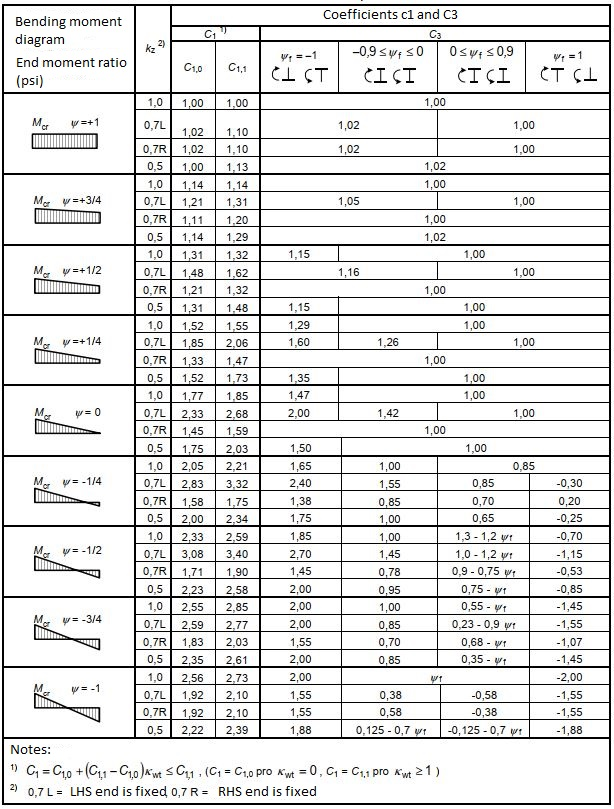

In [ ]:
psi_f = 0  # effect of profile assymmetry

In [ ]:
kz = 1 # simple support for bending
kw = 1 # warping not prevented
kappa_wt = math.pi / kw / (Lcrz) * math.sqrt(E * Iwc / G / Itc)
zeta_g = math.pi * (1000 * zg) / kz / (Lcrz) * math.sqrt(E * Izc / G / Itc)
zj = 0 # section is symmetric about the y axis, therefore zeta_j is also zero
zeta_j = math.pi * (1000 * zj) / kz / (Lcrz) * math.sqrt(E * Izc / G / Itc)

In [ ]:
print("kappa_wt                  = ", ("%2.3f" % kappa_wt), " [-]")
print("zeta_g                    = ", ("%2.3f" % zeta_g), " [-]")
print("zeta_j                    = ", ("%2.3f" % zeta_j), " [-]")

In [ ]:
C10 = 1.77
C11 = 1.85
C1 = C10 + (C11 - C10) * kappa_wt
C2 = 0.55
C3 = 1

In [ ]:
print("C1                        = ", ("%2.3f" % C1), " [-]")

In [ ]:
# Dimensionless critical moment
mu_cr = C1 / kz * (math.sqrt(1 + kappa_wt**2 + (C2 * zeta_g - C3 * zeta_j)**2) - (C2 * zeta_g - C3 * zeta_j))
M_cr = (mu_cr * math.pi * math.sqrt(E * Izc * G * Itc) / (1000 * Lcrz)) / 1000000
# The relative slenderness
lambda_LT_dash = math.sqrt(Wyc / 10**(9) * fy / (M_cr))

In [ ]:
print("mu_cr                     = ", ("%2.3f" % mu_cr), " [-]")
print("M_cr                      = ", ("%2.3f" % M_cr), " [kNm]")
print("lambda_LT_dash            = ", ("%2.3f" % lambda_LT_dash), " [-]")

In [ ]:
curve = "B"
# imperfection factor
alphaLT=0.8 
if curve == "A0":
    alphaLT=0.13
if curve == "A":
    alphaLT=0.21
if curve == "B":
    alphaLT=0.34
if curve == "C":
    alphaLT=0.49
if curve == "D":
    alphaLT=0.76

In [ ]:
PHI_LT = 0.5 * (1 + alphaLT * (lambda_LT_dash - 0.2) + lambda_LT_dash**2)
chi_LT = min(1, 1 / (PHI_LT + math.sqrt(PHI_LT**2 - lambda_LT_dash**2)))

In [ ]:
print("PHI_LT                    = ", ("%2.3f" % PHI_LT), " [-]")
print("chi_LT                    = ", ("%2.3f" % chi_LT), " [-]")

### Interaction of bending moment and axial force

In [ ]:
Cmy = 0.9
psi = 0    #Table NB.3.1 of CSN EN 1993-1-1
CmLT = 0.6 + psi * 0.4

In [ ]:
NEd =amp * (RA_1 + Tcd)
NRk = Ac / 10**(2) * fy
MEd = amp * (Mca_1 + Mca_2)
MyRk = Wyc / 10**(9) * fy

In [ ]:
print("NEd                       = ", ("%2.3f" % NEd), " [kN]")
print("NRk                       = ", ("%2.3f" % NRk), " [kN]")
print("MEd                       = ", ("%2.3f" % MEd), " [kNm]")
print("MyRk                      = ", ("%2.3f" % MyRk), " [kNm]")

In [ ]:
kyy = min(Cmy*(1 + (lambda_dash_y - 0.2)* NEd * gammaM1 / chi_y / NRk), Cmy * (1 + 0.8 * NEd * gammaM1 / chi_y / NRk))

In [ ]:
print("kyy                       = ", ("%2.3f" % kyy), " [-]")

In [ ]:
kzy = max(1 - 0.1 * lambda_dash_z * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRk, 1 - 0.1 * NEd * gammaM1 / (CmLT - 0.25) / chi_z / NRk )

In [ ]:
print("kzy                       = ", ("%2.3f" % kzy), " [-]")

### M+A Interaction Check

In [ ]:
UF1 = NEd * gammaM1 / chi_y / NRk + kyy * MEd * gammaM1 / chi_LT / MyRk
UF2 = NEd * gammaM1 / chi_z / NRk + kzy * MEd * gammaM1 / chi_LT / MyRk

In [ ]:
print("UF1                       = ", ("%2.3f" % UF1), " [-]")
print("UF2                       = ", ("%2.3f" % UF2), " [-]")

# Appendix A: Analysis of internal forces and displacements on portal frame

### Frame with pinned supports loaded by UDL on rafter

In [ ]:
# Appendix A: Analysis of internal forces on a simple frame
class frame_analysis:
    def __init__(self, L, H, Iyc, Iyr, EHF, E):
        self.L = L
        self.H = H
        self.Iyc = Iyc
        self.Iyr = Iyr
        self.EHF = EHF
        self.E = E
    
    def analyse(self):
        # Horizoontal deformatiuon of frame due to horizontal force at eave, based on Appendix A
        k1 = self.Iyc * 10**(-12) / self.H
        k2 = self.Iyr * 10**(-12)/ self.L 
        psi_EHF = (self.EHF * self.H / 6) * ((k1 + 2*k2) / k1 / k2)
        DELTA_EHF = psi_EHF * self.H / 2 / self.E
        print("calculating")
    

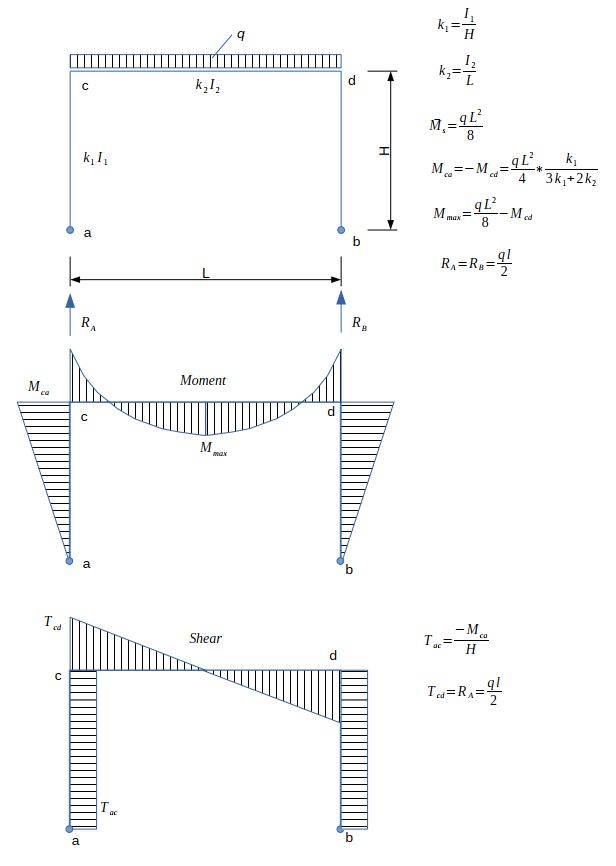

### Frame with pinned supports loaded by horizontal force at eave

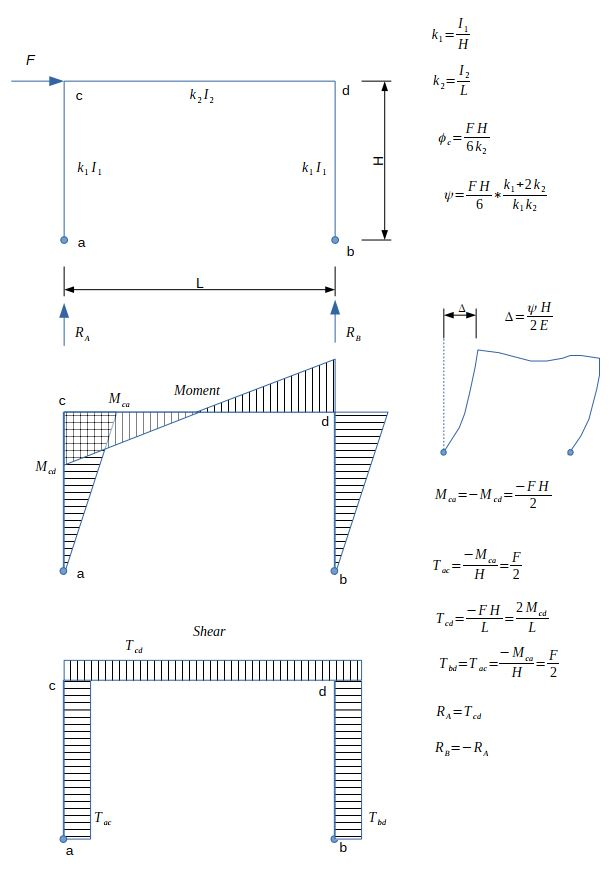

# Appendix XX: Full scale experiment at CTU

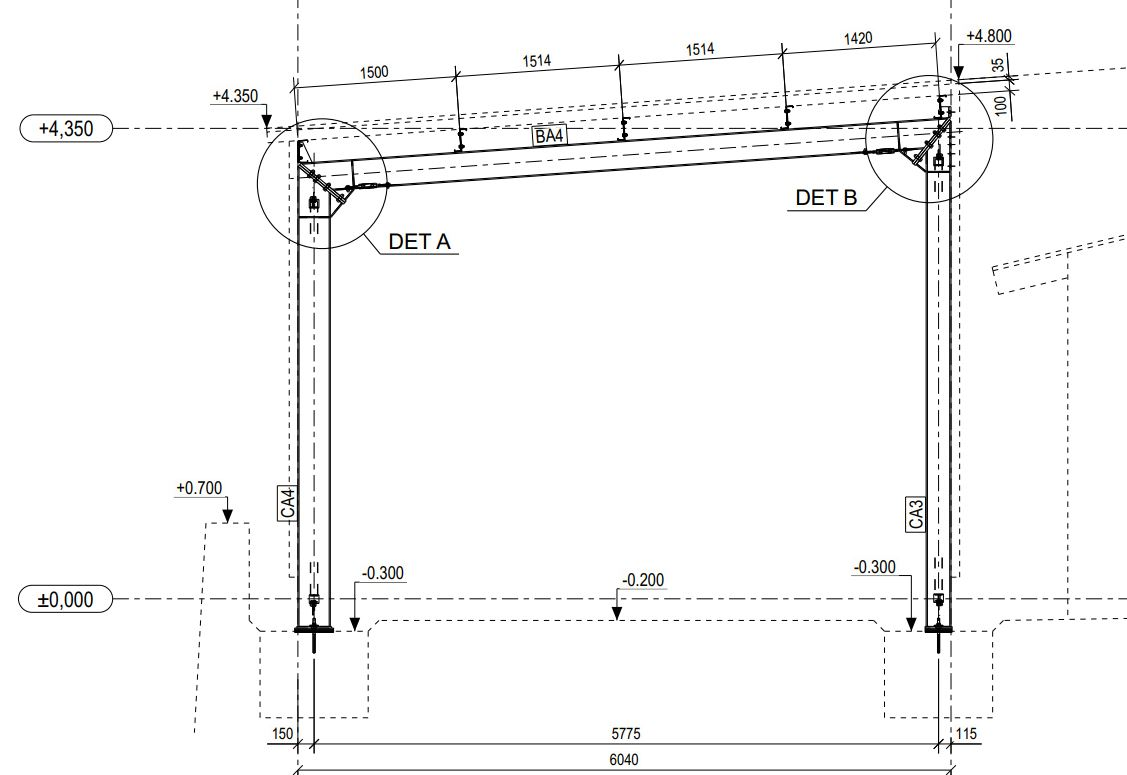

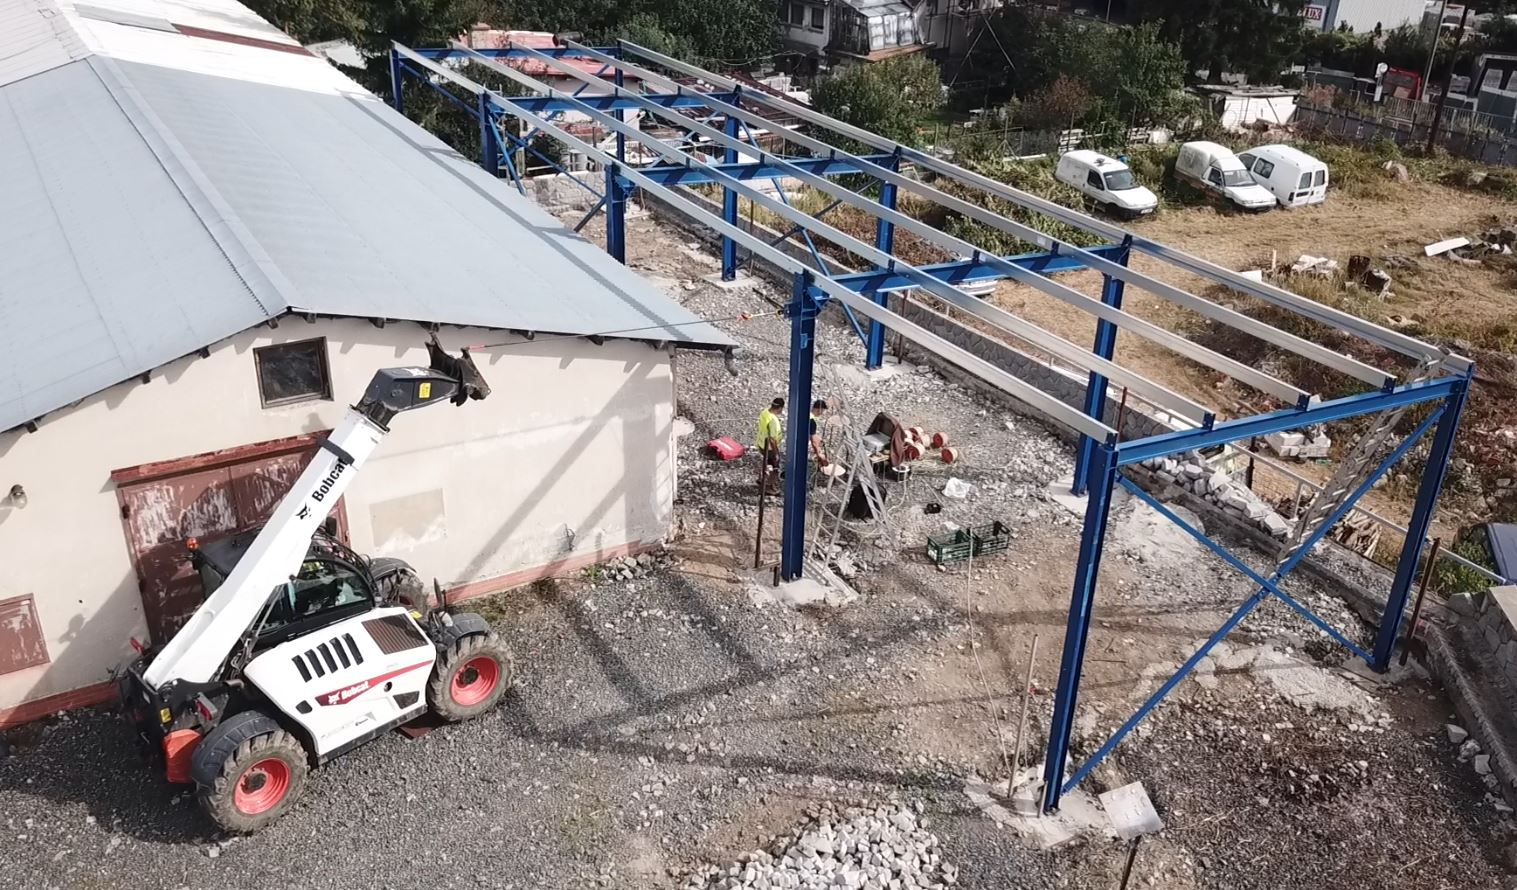

# References
[1] Eurocode 3
[2] Eurocode wind loading
[3] Eurocode snow loading
[4] Jednoduchý rám ve vzorcích, Ing. Dr. Otakar Novák, Sbírka technických spisů - Konstrukter, Ústav pro učebné pomůcky průmyslových a odborných škol , 1943